In [1]:
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [7]:
data = pd.read_csv("Prostate_Cancer.csv",index_col=False)
data.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [8]:
modifiedData = pd.get_dummies(data,columns=['diagnosis_result'],drop_first=True)
modifiedData.head()


,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,diagnosis_result_M
0,1,23,12,151,954,0.143,0.278,0.242,0.079,1
1,2,9,13,133,1326,0.143,0.079,0.181,0.057,0
2,3,21,27,130,1203,0.125,0.160,0.207,0.060,1
3,4,14,16,78,386,0.070,0.284,0.260,0.097,1
4,5,9,19,135,1297,0.141,0.133,0.181,0.059,1


In [9]:
#using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(modifiedData.drop('diagnosis_result_M',axis=1))
#removing the last column of the dataframe as this table will be used for the feature matrix
scaled_features=scaler.transform(modifiedData.drop('diagnosis_result_M',axis=1))
new_data=pd.DataFrame(scaled_features,columns=modifiedData.columns[:-1])

In [10]:
new_data.head()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,-1.714816,1.266830,-1.205746,2.301611,0.789417,2.764210,2.486970,1.594151,1.764464
1,-1.680173,-1.617011,-1.012208,1.537520,1.958830,2.764210,-0.784061,-0.397314,-0.948199
2,-1.645531,0.854853,1.697335,1.410172,1.572169,1.528655,0.547364,0.451507,-0.578290
3,-1.610888,-0.587068,-0.431591,-0.797201,-0.996139,-2.246650,2.585594,2.181796,3.983916
4,-1.576245,-1.617011,0.149025,1.622419,1.867666,2.626926,0.103555,-0.397314,-0.701593


In [11]:
#Feature Matrix
x = new_data
y = modifiedData['diagnosis_result_M']

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,train_size=0.75)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [61]:
predictedResult = KNN.predict(X_test)


In [62]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(classification_report(Y_test,predictedResult))
print("Accuracy of the model for (K = 1) is :",accuracy_score(Y_test,predictedResult)*100,"%")

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.79      0.79      0.79        14

    accuracy                           0.76        25
   macro avg       0.76      0.76      0.76        25
weighted avg       0.76      0.76      0.76        25

Accuracy of the model for (K = 1) is : 76.0 %


In [65]:
#Trying other values of K to improve accuracy

accuracy=[]
for i in range(1,40):
    KNN=KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,Y_train)
    predictedResult=KNN.predict(X_test)
    accuracy.append(accuracy_score(Y_test,predictedResult))

[[ 7  4]
 [ 0 14]]


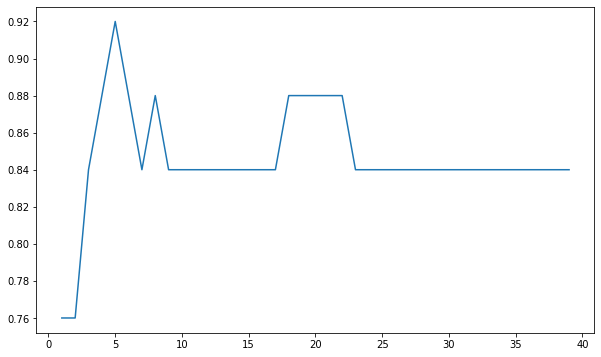

In [66]:
print(confusion_matrix(Y_test,predictedResult))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy)


In [71]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,Y_train)


KNeighborsClassifier()

In [73]:
predictedResult = KNN.predict(X_test)
print(classification_report(Y_test,predictedResult))
print("Accuracy of the model for (K = 5) is :",accuracy_score(Y_test,predictedResult)*100,"%")

print(confusion_matrix(Y_test,predictedResult))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.88      1.00      0.93        14

    accuracy                           0.92        25
   macro avg       0.94      0.91      0.92        25
weighted avg       0.93      0.92      0.92        25

Accuracy of the model for (K = 5) is : 92.0 %
[[ 9  2]
 [ 0 14]]


In [ ]:
# Now this value of K(K=5) gives better accuracy i.e 92%
#Done